In [3]:
from google.colab import files
files.upload()

Saving Peace.jpeg to Peace.jpeg


{'Peace.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x03\x03\x03\x03\x03\x03\x04\x04\x04\x04\x05\x05\x05\x05\x05\x07\x07\x06\x06\x07\x07\x0b\x08\t\x08\t\x08\x0b\x11\x0b\x0c\x0b\x0b\x0c\x0b\x11\x0f\x12\x0f\x0e\x0f\x12\x0f\x1b\x15\x13\x13\x15\x1b\x1f\x1a\x19\x1a\x1f&""&0-0>>T\x01\x03\x03\x03\x03\x03\x03\x04\x04\x04\x04\x05\x05\x05\x05\x05\x07\x07\x06\x06\x07\x07\x0b\x08\t\x08\t\x08\x0b\x11\x0b\x0c\x0b\x0b\x0c\x0b\x11\x0f\x12\x0f\x0e\x0f\x12\x0f\x1b\x15\x13\x13\x15\x1b\x1f\x1a\x19\x1a\x1f&""&0-0>>T\xff\xc2\x00\x11\x08\x01E\x01E\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x01\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x06\x04\x07\x08\x03\x02\t\xff\xda\x00\x08\x01\x01\x00\x00\x00\x00\xfe\xa6\xd9R\x91eE\x80*\x15*X,\xa9H\xb2\xa2\xc0\x15\n\x95,\x14\x02R\n\x00\x00\x08\x01`\xf9u\x1f\xd3|\xd8(\x0b\x00\x16\n\x01+\x0f\xd3\x9b\xd7\xe3\xb0\xbf@\x9cnG\xe8\x00"\xca\x94\x8b\'D\xef|=\xbf2\r\x0fC\xdd\xfb\x04T\xa

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.12G/2.13G [00:09<00:00, 255MB/s]
100% 2.13G/2.13G [00:09<00:00, 232MB/s]


In [6]:
!unzip leapgestrecog.zip -d leapgestrecog

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapgestrecog/leapGest

In [7]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the unzipped dataset
dataset_path = '/content/leapgestrecog'

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Adjust based on number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 339s 336ms/step - accuracy: 0.4993 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 341s 341ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 337s 336ms/step - accuracy: 0.5060 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 384s 338ms/step - accuracy: 0.5015 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 378s 335ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 10/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: 

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - accuracy: 0.5035 - loss: 0.6931
Validation Accuracy: 50.00%


In [11]:
# Save the model in HDF5 format explicitly
model.save('/content/drive/My Drive/path_to_save_model/gesture_recognition_model.h5')

# Print confirmation message
print(f'Model saved successfully at /content/drive/My Drive/path_to_save_model/gesture_recognition_model.h5')

Model saved successfully at /content/drive/My Drive/path_to_save_model/gesture_recognition_model.h5


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os

# List files in your Google Drive directory
drive_dir = '/content/drive/My Drive/path_to_save_model/'
files_in_drive = os.listdir(drive_dir)
print(files_in_drive)  # Ensure 'gesture_recognition_model.h5' is listed

['gesture_recognition_model.h5']


In [14]:
from tensorflow.keras.models import load_model

# Load the pre-trained model from Google Drive
model_path = '/content/drive/My Drive/path_to_save_model/gesture_recognition_model.h5'
model = load_model(model_path)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,460 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [15]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import Image, display

# Function to upload and predict
def upload_and_predict():
    try:
        # Upload file and get file path
        uploaded = files.upload()
        file_path = list(uploaded.keys())[0]  # Assuming only one file is uploaded

        # Load uploaded image or video frame
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB (if needed)
        img = cv2.resize(img, (64, 64))  # Resize image to model's input shape
        img = img.astype('float32') / 255.0  # Normalize pixel values
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Predict gesture
        predictions = model.predict(img)
        class_index = np.argmax(predictions)
        class_label = class_labels[class_index]

        # Display uploaded image and prediction
        display(Image(file_path))
        print("Predicted Gesture:", class_label)

    except Exception as e:
        print(f"Error: {str(e)}")

In [16]:
# Define class labels
class_labels = {
    0: 'Fist',
    1: 'Five',
    2: 'Point',
    3: 'Swing',
    4: 'Ok',
    5: 'Peace',
    6: 'Rock',
    7: 'Thumb'
}



Saving fist.jpeg to fist.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


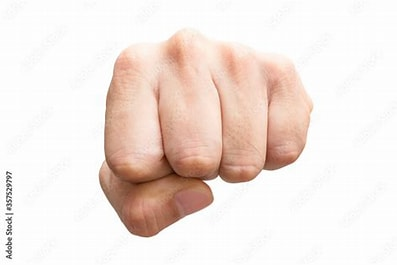

Predicted Gesture: Five


In [17]:
# Run the function
upload_and_predict()